In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv('processed_evaluate.csv')
data.drop(columns=['variables', 'constraints'], inplace=True)
data


,pkid,layers,method,ARG,in_constraints_probs,best_solution_probs,iteration_count
0,0,1,HEA,1.045567,99.921875,0.000000,151.0
1,0,1,commute,0.164989,100.000000,60.058594,29.2
2,0,1,cyclic,41.509743,22.089844,3.857422,32.2
3,0,1,penalty,53.457285,10.429688,2.216797,34.6
4,0,2,HEA,5.865947,90.087891,0.000000,151.0
...,...,...,...,...,...,...,...
331,11,6,penalty,158.887681,0.000000,0.000000,113.9
332,11,7,HEA,169.505014,0.000000,0.000000,151.0
333,11,7,commute,0.193977,100.000000,13.994141,141.2
334,11,7,cyclic,30.530602,49.531250,0.000000,138.8


In [37]:
# 过滤数据
filtered_data = data[
    ((data['method'] == 'commute') & (data['layers'] == 1)) | 
    ((data['method'].isin(['penalty', 'HEA', 'cyclic'])) & (data['layers'] == 7) & (data['best_solution_probs'] != 0) & (data['in_constraints_probs'] != 0))
]
filtered_data = filtered_data.reset_index(drop=True)
filtered_data

,pkid,layers,method,ARG,in_constraints_probs,best_solution_probs,iteration_count
0,0,1,commute,0.164989,100.000000,60.058594,29.200000
1,0,7,HEA,44.912728,26.435547,8.906250,151.000000
2,0,7,cyclic,15.258196,58.857422,13.828125,150.800000
3,0,7,penalty,38.961044,22.021484,3.789062,143.600000
4,1,1,commute,0.299001,100.000000,46.015625,28.900000
5,1,7,cyclic,70.948516,1.816406,0.097656,140.200000
6,1,7,penalty,107.684447,0.468750,0.136719,143.300000
7,2,1,commute,0.501108,100.000000,10.390625,28.400000
8,2,7,cyclic,94.616833,0.341797,0.019531,139.500000
9,3,1,commute,0.434504,100.000000,12.158203,27.700000


In [38]:
for i in filtered_data:
  print(i)

pkid
layers
method
ARG
in_constraints_probs
best_solution_probs
iteration_count


In [39]:
# 计算'commute'方法的均值
commute_means = filtered_data[filtered_data['method'] == 'commute'][['in_constraints_probs', 'best_solution_probs']].mean()
# 计算其他方法的提升
commute_means

in_constraints_probs    100.000000
best_solution_probs      31.291504
dtype: float64

In [40]:
filtered_data['in_constraints_probs'] = filtered_data.apply(
    lambda row: commute_means['in_constraints_probs'] / row['in_constraints_probs'] if row['method'] != 'commute' else 0, axis=1)
filtered_data['best_solution_probs'] = filtered_data.apply(
    lambda row: commute_means['best_solution_probs'] / row['best_solution_probs'] if row['method'] != 'commute' else 0, axis=1)

# 只保留非'commute'方法的提升数据
diff_data = filtered_data[filtered_data['method'] != 'commute']


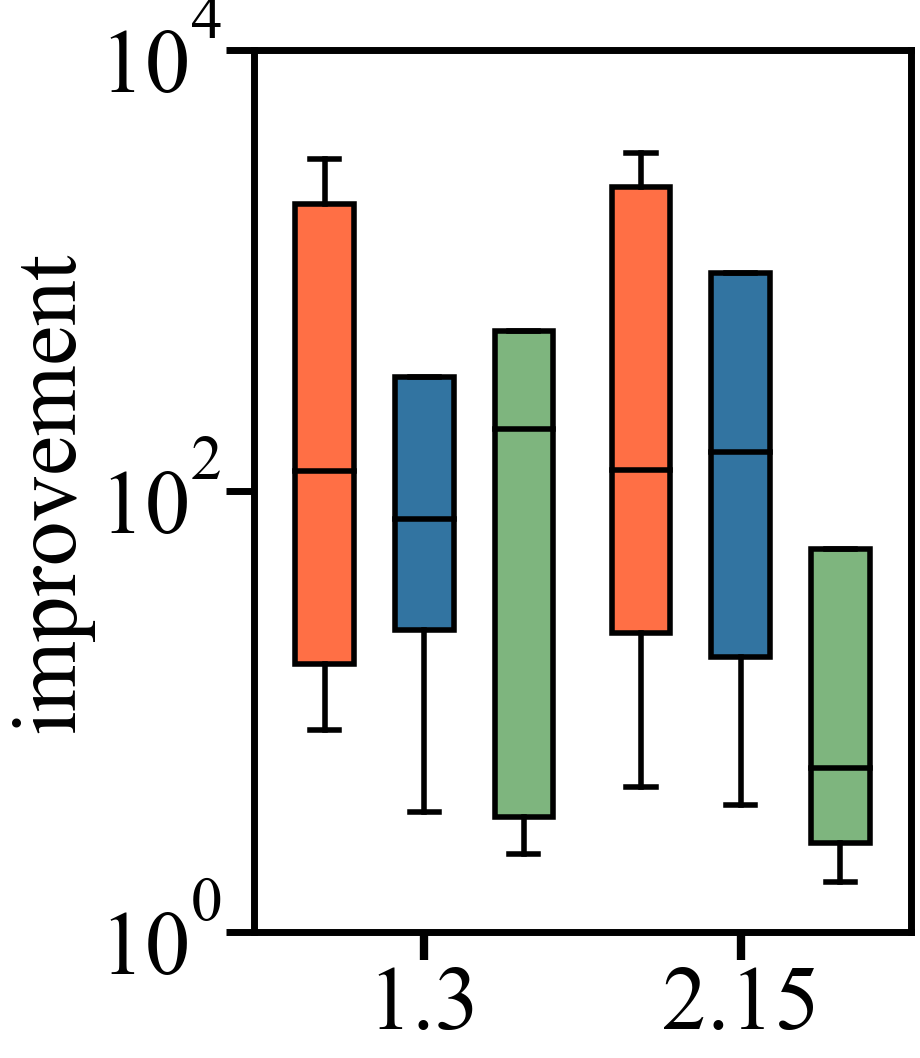

In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


scale = 1.05
fig= plt.figure(figsize=(25*scale, 12*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 65,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 6,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 2,
    "markers.fillstyle" :  'full',
    'lines.markeredgecolor': 'black',
})
colors = ["#FF6F45", "#3274A1", "#7EB57E"]
axes = plt.axes([0, 0, 0.25, 0.7])
box = axes.boxplot([diff_data[diff_data['method'] == method]['best_solution_probs'] for method in ['penalty', 'HEA', 'cyclic']] + 
             [diff_data[diff_data['method'] == method]['in_constraints_probs'] for method in ['penalty', 'HEA', 'cyclic']],
              positions=[1.3, 2.15, 3, 4, 4.85, 5.7],
            showfliers=False, patch_artist=True,
            boxprops=dict(linewidth=4, edgecolor='black'),  # 设置箱体边框宽度和颜色
            whiskerprops=dict(linewidth=4, color='black'),   # 设置须的宽度和颜色
            capprops=dict(linewidth=4, color='black'),       # 设置帽的宽度和颜色
            medianprops=dict(linewidth=4, color='black'))  
# 添加图例
labels = ['penalty', 'HEA', 'cyclic']

for patch, color in zip(box['boxes'], colors*2):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(4)

# 创建自定义图例
for i, patch in enumerate(box['boxes']):
    patch.set_edgecolor('black')  # 确保图例颜色与箱型图一致

# axes.legend([box['boxes'][i] for i in range(3)], labels, loc='upper left')
axes.set_ylim(1, 10000)
axes.set_xlim(0.7, 6.3)
axes.set_xticks([2.15, 4.85], minor=False)
# axes.set_xticklabels(['in_const', 'best_s'], minor=False)
axes.set_ylabel('improvement')
axes.set_yscale("log")
# plt.show()
plt.savefig("box.svg", bbox_inches="tight")